 # Figure A5: Changes-in-changes estimations

In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
which cic

/Applications/Stata/ado/base/c/cic.ado


In [4]:
help cic


help cic 
--------------------------------------------------------------------------------

Title
-----

    cic                  Changes-in-changes


Syntax
------

       cic depvar [indepvars] [if] [in] [weight] , group(varname)
                time(varname) [options]

    options                    Description
    --------------------------------------------------------------------------

    Samples
      group(varname)           specifies the groups; this option is required.
      time(varname)            specifies the time periods; this option is
                                 required.

    Quantiles
      quantiles(numlist)       sets the quantile(s) at which the
                                 changes-in-changes will be estimated; default
                                 is quantiles(0.1(0.1)0.9).

    Conditional model
      nreg(#)                  sets the number of regressions estimated to
                                 approximate the conditional distribution;
    

In [5]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color




not available in non-GUI version



In [6]:
**************************************************************************
*** FigureA5. Changes-in-changes estimations
**************************************************************************
gen G0T0=(alongcanal==0 & reform==0)
gen G1T0=(alongcanal==1 & reform==0)
gen G0T1=(alongcanal==0 & reform==1)
gen G1T1=(alongcanal==1 & reform==1)
qui reg $Y G0T0 G1T0 G0T1 G1T1 c.ashprerebels#i.year i.OBJECTID i.year i.provid#i.year i.prefid#c.year, nocons
predict res, residual
mat coef=e(b)
gen Yhat=res+coef[1,1]*G0T0+coef[1,2]*G1T0+coef[1,3]*G0T1+coef[1,4]*G1T1
su Yhat,detail







(10,218 missing values generated)


(10,218 missing values generated)


                            Yhat
-------------------------------------------------------------
      Percentiles      Smallest
 1%    -2.659257      -3.276513
 5%    -2.508334      -3.261038
10%    -2.468114      -3.257382       Obs             140,432
25%    -2.431374      -3.219827       Sum of wgt.     140,432

50%     -2.40494                      Mean          -2.275682
                        Largest       Std. dev.       .432406
75%    -2.101542       4.203474
90%    -1.964646       4.209453       Variance        .186975
95%     -1.93403          4.276       Skewness       8.488402
99%     -1.88302       4.344619       Kurtosis       94.90205


The use of difference-in-differences (DID) methods is widespread in program evaluation and empirical economics (Imbens and Wooldridge 2009). DID methods involve comparing outcomes between two groups across two time periods, where only one of the two groups are exposed to the intervention in one of the periods. The DID estimator calculates the difference in outcomes between the treatment and comparison groups after the intervention began, minus the difference in outcomes between the treatment and comparison groups before the intervention began. Or, equivalently, the DID estimator can be seen as the change in outcomes for the treatment group before and after the intervention, minus the change in outcomes for the comparison group over the same time period. It is straightforward to generalize this basic two group, two period DID model has been generalized in various ways—for example, to adjust for observed covariates, include more than two groups, or include more than two time periods.

Athey and Imbens (2006) proposed a changes-in-changes (CIC) model which generalizes the DID model by relaxing relaxes several assumptions. (Thus the standard DID model is nested in the CIC model as a special case.) The CIC model estimates the entire distribution of outcomes under the counterfactual, allowing one to calculate average treatment effects or estimate effects at specific quantiles.

This Stata command, cic, implements the CIC estimator from Athey and Imbens (2006). cic is written in Mata with an effort to maximize parallel computing; in tests (not shown), I found cic estimated the model more quickly that the Matlab code previously distributed by the Athey and Imbens. The cic command also offers several previously unavailable features (e.g., to allow for covariates). In addition, you can use Stata's bootstrap: prefix, which offers more flexibility for computing bootstrapped standard errors (e.g., strata, blocks).

Imbens and Wooldridge (2009) provide a nice, short overview of the method. Athey and Imbens (2006) explain their methods (with proofs) in a fairly long and complicated article. The appendix is also quite helpful.

The Stata help file (cic.sthlp) provides additional documentation and examples.

In [8]:
cic Yhat, group(alongcanal) time(reform) reps(100)
matrix qte=e(qte)

clear
svmat qte, names(qte)
rename (qte1 qte2 qte3 qte4 qte5) (qntl qte std lb ub)
#d ;
twoway 
(line lb qntl, lpattern(dash) lcolor("0 0 0"))
(line ub qntl, lpattern(dash) lcolor("0 0 0"))
(scatter qte qntl, color(gs0) msize(*0.75))
(line qte qntl, lpattern(solid) lcolor("4 4 4"))
,
ytitle("Treatment effects", size(*0.9)) 
xtitle("Quantiles", size(*0.9) margin(medsmall))
yline(0(0.025)0.15, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(0(0.1)1, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
ylabel(0(0.05)0.15, angle(0) format(%5.2f) labsize(*0.85))
xlabel(, format(%5.1f) labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figureA5.pdf", replace


(bootstrapping .................................................................
> ...................................)

Conditional model                         linear quantile regression

The variance has been estimated by bootstraping the results 100 times.

No. of obs. in the control group in period 0: 81840   
No. of obs. in the control group in period 1: 39990   
No. of obs. in the treated group in period 0: 12496   
No. of obs. in the treated group in period 1: 6106    


Changes-in-changes estimates
------------------------------------------------------------------------------
Quantile    |     QTE    Pointwise     Pointwise              Functional      
            |            Std. Err. [95% Conf. Interval]  [95% Conf. Interval] 
------------+-----------------------------------------------------------------
 .1         |   .106024   .010875    .084709   .127339         .077   .135047
 .2         |   .055161   .005063    .045238   .065084      .041649   .068673
 .3         |

In [11]:
clear
svmat qte, names(qte)
rename (qte1 qte2 qte3 qte4 qte5) (qntl qte std lb ub)
#d ;
twoway 
(line lb qntl, lpattern(dash) lcolor("0 0 0"))
(line ub qntl, lpattern(dash) lcolor("0 0 0"))
(scatter qte qntl, color(gs0) msize(*0.75))
(line qte qntl, lpattern(solid) lcolor("4 4 4"))
,
ytitle("Treatment effects", size(*0.9)) 
xtitle("Quantiles", size(*0.9) margin(medsmall))
yline(0(0.025)0.15, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(0(0.1)1, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
ylabel(0(0.05)0.15, angle(0) format(%5.2f) labsize(*0.85))
xlabel(, format(%5.1f) labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figureA5.png", replace



number of observations will be reset to 9
Press any key to continue, or Break to abort
--more--


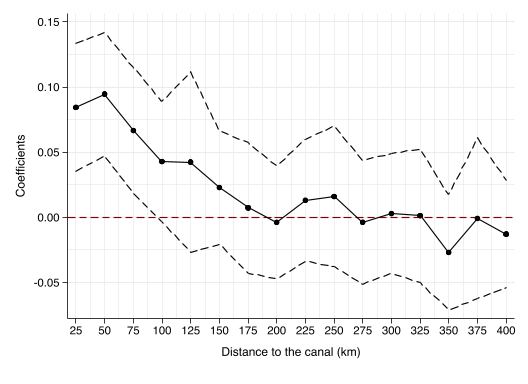

Note. The figure depicts the quantile treatment effects on the distribution estimated using the changes- in-changes method. The solid line represents the point estimates, whereas the dashed lines represent the bootstrapped 95% confidence intervals. The estimation partials out county fixed effects, year fixed effects, pre-treatment rebelliousness × year fixed effects, province × year fixed effects, and prefecture-specific time trends.

In [12]:
**************************************************************************
*** Write to Latex
**************************************************************************
file open f using "Results/Figures/figureA5.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Changes-in-changes estimations}" _n
file write f "\includegraphics[width=.9\textwidth]{Figures/figureA5.pdf}\hspace{\fill}%" _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the quantile treatment effects on the distribution estimated using the changes-in-changes method.  }" _n
file write f "The solid line represents the point estimates, whereas the dashed lines represent the bootstrapped 95\% confidence intervals. "
file write f "The estimation partials out county fixed effects, year fixed effects, pre-treatment rebelliousness $ \times $ year fixed effects, province $ \times $ year fixed effects, and prefecture-specific time trends. "
file write f "\end{figure}" _n
file close f


(file Results/Figures/figureA5.tex not found)










